# 任务1 赛题分析(2天)


##  一 认识数据



### 1了解比赛的背景
    - 线上比赛要求参赛选手根据给定的数据集，建立模型，预测房屋租金。

    - 数据集中的数据类别包括租赁房源、小区、二手房、配套、新房、土地、人口、客户、真实租金等。

    - 平台提供的数据包括训练集、预测试集(Test A)、正式测试集(Test B)，详见数据集说明。
    
    - 参赛选手需要将预测的结果按照测试集ID顺序输出，以便平台对提交模型的结果进行验证。每天每个参赛者最多可以提交2次。


### 2分类问题还是回归问题

    回归问题

### 3熟悉比赛的评分函数


    模型评分标准是R-Square
    
    **R2（R-Square）的公式为**：

    残差平方和：
    $$
     SS_{res}=\sum\left(y_{i}-\hat{y}_{i}\right)^{2}
    $$
    总平均值:
    $$
     SS_{tot}=\sum\left(y_{i}-\overline{y}_{i}\right)^{2}
    $$

    其中$\overline{y}$表示$y$的平均值
    得到$R^2$表达式为：
    $$
        R^{2}=1-\frac{SS_{res}}{SS_{tot}}=1-\frac{\sum\left(y_{i}-\hat{y}_{i}\right)^{2}}{\sum\left(y_{i}-\overline{y}\right)^{2}}
    $$
    $R^2$用于度量因变量的变异中可由自变量解释部分所占的比例，取值范围是 0~1，$R^2$越接近1,表明回归平方和占总平方和的比例越大,回归线与各观测点越接近，用x的变化来解释y值变化的部分就越多,回归的拟合程度就越好。所以$R^2$也称为拟合优度（Goodness of Fit）的统计量。

    $y_{i}$表示真实值，$\hat{y}_{i}$表示预测值，$\overline{y}_{i}$表示样本均值。得分越高拟合效果越好。

## 二 对比赛数据做EDA


## 2. 数据概况

**1.租赁基本信息：**
* ID——房屋编号　　　　　　　　　　　　　　　　　　
* area——房屋面积 　　　
* rentType——出租方式：整租/合租/未知　
* houseType——房型 　　　　　　　　　
* houseFloor——房间所在楼层：高/中/低　　　　　
* totalFloor——房间所在的总楼层数　　　　　　　　
* houseToward——房间朝向　　　　　　　　　　　
* houseDecoration——房屋装修　

* tradeTime——成交日期　　　　　　　　　　　　　　　
* tradeMoney——成交租金　

**2.小区信息：**
* CommunityName——小区名称　　　　　　　　
* city——城市　　　　　　　　　　　　　　　　　
* region——地区　　　　　　　　　　　　　　　
* plate——区域板块　　　　　　　　　　　　　　
* buildYear——小区建筑年代　　　　　　　　　　
* saleSecHouseNum——该板块当月二手房挂牌房源数　　　

**3.配套设施：**
* subwayStationNum——该板块地铁站数量　　　　　　　
* busStationNum——该板块公交站数量　　　　　　　　　
* interSchoolNum——该板块国际学校的数量　　　　　　
* schoolNum——该板块公立学校的数量　　　　　　　　
* privateSchoolNum——该板块私立学校数量　　　　　
* hospitalNum——该板块综合医院数量　　　　　　　　　
* DrugStoreNum——该板块药房数量　　　　　　　　
* gymNum——该板块健身中心数量　　　　　　　　　　
* bankNum——该板块银行数量　　　　　　　　　　　
* shopNum——该板块商店数量　　　　　　　　　　　
* parkNum——该板块公园数量　　　　　　　　　　　
* mallNum——该板块购物中心数量　　　　　　　　　
* superMarketNum——该板块超市数量　　　　　　　

**4.其他信息：**
* totalTradeMoney——该板块当月二手房成交总金额　　　
* totalTradeArea——该板块二手房成交总面积　　　　　　
* tradeMeanPrice——该板块二手房成交均价　　　　　　　
* tradeSecNum——该板块当月二手房成交套数　　　　　

* totalNewTradeMoney——该板块当月新房成交总金额　　　
* totalNewTradeArea——该板块当月新房成交的总面积　　　
* totalNewMeanPrice——该板块当月新房成交均价　　　　　
* tradeNewNum——该板块当月新房成交套数　　　　　　　　
* remainNewNum——该板块当月新房未成交套数　　　　　　
* supplyNewNum——该板块当月新房供应套数　　　　　　　

* supplyLandNum——该板块当月土地供应幅数　　　　　 
* supplyLandArea——该板块当月土地供应面积　　　　　
* tradeLandNum——该板块当月土地成交幅数　　　　　　
* tradeLandArea——该板块当月土地成交面积　　　　　 
* landTotalPrice——该板块当月土地成交总价　　　　　
* landMeanPrice——该板块当月楼板价(元/m^{2})　　　

* totalWorkers——当前板块现有的办公人数　　　　　　　
* newWorkers——该板块当月流入人口数（现招聘的人员）　
* residentPopulation——该板块常住人口　　　　　　　　

* pv——该板块当月租客浏览网页次数　　　　　　　　　　　
* uv——该板块当月租客浏览网页总人数　　　　　　　　　　
* lookNum——线下看房次数　　　　　　　　　　　　　　

    

### 结论
可以看出trademoney 就是y

### 2 训练数据和测试数据 是否分布一致

  通过考察两个数据集的字段分布情况 缺失情况 

In [302]:
### 导入文件\
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data_train=pd.read_csv('数据集/train_data.csv')
data_test=pd.read_csv('数据集/test_a.csv')


SyntaxError: invalid character in identifier (<ipython-input-302-aeed4e96b193>, line 7)

In [306]:
pd.set_option('max_column',1000)
pd.set_option('max_row',300)

In [207]:
data_train.info()#训练集信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41440 entries, 0 to 41439
Data columns (total 51 columns):
ID                    41440 non-null int64
area                  41440 non-null float64
rentType              41440 non-null object
houseType             41440 non-null object
houseFloor            41440 non-null object
totalFloor            41440 non-null int64
houseToward           41440 non-null object
houseDecoration       41440 non-null object
communityName         41440 non-null object
city                  41440 non-null object
region                41440 non-null object
plate                 41440 non-null object
buildYear             41440 non-null object
saleSecHouseNum       41440 non-null int64
subwayStationNum      41440 non-null int64
busStationNum         41440 non-null int64
interSchoolNum        41440 non-null int64
schoolNum             41440 non-null int64
privateSchoolNum      41440 non-null int64
hospitalNum           41440 non-null int64
drugStoreNum       

In [208]:
data_test.info()#测试集信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 50 columns):
ID                    2469 non-null int64
area                  2469 non-null float64
rentType              2469 non-null object
houseType             2469 non-null object
houseFloor            2469 non-null object
totalFloor            2469 non-null int64
houseToward           2469 non-null object
houseDecoration       2469 non-null object
communityName         2469 non-null object
city                  2469 non-null object
region                2469 non-null object
plate                 2469 non-null object
buildYear             2469 non-null object
saleSecHouseNum       2469 non-null int64
subwayStationNum      2469 non-null int64
busStationNum         2469 non-null int64
interSchoolNum        2469 non-null int64
schoolNum             2469 non-null int64
privateSchoolNum      2469 non-null int64
hospitalNum           2469 non-null int64
drugStoreNum          2469 non-null int64

### 结论
训练集测试集特征名字一致
训练集 pv uv 有20个空值 测试集pv uv有两个空值 

# 缺失值分析

    

In [211]:
#把18行缺失的数据提出来 
def missing_values(df):
    '''
    df.isnull() 返回的是DataFrame
    df.sum() 返回的是Series index是column name
    len(df) 返回的是行数
    '''
    alldata_na = pd.DataFrame(df.isnull().sum(), columns={'missingNum'})
    alldata_na['existNum'] = len(df) - alldata_na['missingNum']
    alldata_na['sum'] = len(df)
    alldata_na['missingRatio'] = alldata_na['missingNum']/len(df)*100
    alldata_na['dtype'] = df.dtypes
    #ascending：默认True升序排列；False降序排列
    alldata_na = alldata_na[alldata_na['missingNum']>0]
    '''
    因为column name是标签 所以这里要先用reset_index() 把标签提进来
    列名为index
    ?如何更改列名
    '''
    alldata_na=alldata_na.reset_index().sort_values(by=['missingNum'],ascending=[True])
    
    alldata_na.set_index('index',inplace=True)
    return alldata_na

missing_values_=missing_values(data_train)
missing_values_

,missingNum,existNum,sum,missingRatio,dtype
index,,,,,
pv,18,41422,41440,0.043436,float64
uv,18,41422,41440,0.043436,float64


In [212]:
def missing_data(missing_df,data_train):
    index=missing_df.index
    missing_data=pd.DataFrame()
    for x in index:
        missing_data=pd.concat([missing_data,data_train[data_train[x].isnull()]])
    missing_data.drop_duplicates(inplace=True)
    return missing_data

missing_data_=missing_data(missing_values_,data_train)
missing_data_

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney
4370,100312249,63.26,--,1室2厅1卫,低,30,南,其他,XQ03008,SH,...,0,0.0,102958,492,70013,NaN,NaN,0,2018/12/6,10700.0
4373,100312226,46.55,整租,2室1厅1卫,低,6,南,精装,XQ02996,SH,...,0,0.0,102958,492,70013,NaN,NaN,6,2018/12/23,6000.0
4376,100312218,100.20,整租,2室2厅1卫,中,32,南,精装,XQ02979,SH,...,0,0.0,102958,492,70013,NaN,NaN,4,2018/12/15,13800.0
4379,100312213,43.20,整租,1室1厅1卫,高,7,南,精装,XQ03016,SH,...,0,0.0,102958,492,70013,NaN,NaN,14,2018/12/18,4500.0
4387,100312196,24.81,整租,1室0厅1卫,中,6,南,精装,XQ02994,SH,...,0,0.0,102958,492,70013,NaN,NaN,1,2018/12/17,5600.0
4391,100312188,65.11,整租,2室1厅1卫,低,24,南,简装,XQ02993,SH,...,0,0.0,102958,492,70013,NaN,NaN,10,2018/12/20,6000.0
4392,100312179,55.00,整租,1室1厅1卫,中,6,南,其他,XQ02963,SH,...,0,0.0,102958,492,70013,NaN,NaN,2,2018/12/21,6300.0
4396,100312169,49.00,--,2室1厅1卫,低,7,南,其他,XQ03002,SH,...,0,0.0,102958,492,70013,NaN,NaN,9,2018/12/23,8400.0
4399,100312163,23.91,整租,1室0厅1卫,中,6,南,简装,XQ02994,SH,...,0,0.0,102958,492,70013,NaN,NaN,7,2018/12/21,3700.0
4428,100312036,37.80,--,1室1厅1卫,高,7,南,其他,XQ03002,SH,...,0,0.0,102958,492,70013,NaN,NaN,0,2018/12/3,5300.0


In [279]:
missing_data_.describe(include='all')#缺失信息方差信息

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney
count,1.800000e+01,18.000000,18,18,18,18.000000,18,18,18,18,...,18.0,18.0,18.0,18.0,18.0,0.0,0.0,18.000000,18,18.000000
unique,NaN,NaN,2,6,3,NaN,4,3,13,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN
top,NaN,NaN,整租,1室1厅1卫,中,NaN,南,精装,XQ02994,SH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018/12/3,NaN
freq,NaN,NaN,13,7,7,NaN,12,9,4,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
mean,1.003122e+08,54.694444,NaN,NaN,NaN,12.722222,NaN,NaN,NaN,NaN,...,0.0,0.0,102958.0,492.0,70013.0,NaN,NaN,3.555556,NaN,6796.666667
std,8.513119e+01,35.306870,NaN,NaN,NaN,11.317896,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,4.259553,NaN,4989.632781
min,1.003120e+08,23.910000,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,...,0.0,0.0,102958.0,492.0,70013.0,NaN,NaN,0.000000,NaN,1400.000000
25%,1.003121e+08,30.635000,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,...,0.0,0.0,102958.0,492.0,70013.0,NaN,NaN,0.000000,NaN,4525.000000
50%,1.003122e+08,41.780000,NaN,NaN,NaN,6.500000,NaN,NaN,NaN,NaN,...,0.0,0.0,102958.0,492.0,70013.0,NaN,NaN,1.500000,NaN,5450.000000
75%,1.003122e+08,61.195000,NaN,NaN,NaN,19.750000,NaN,NaN,NaN,NaN,...,0.0,0.0,102958.0,492.0,70013.0,NaN,NaN,6.000000,NaN,6275.000000


### 查看测试集中信息缺失值的情况

In [268]:
missing_values__=missing_values(data_test)

In [269]:
missing_values__

,missingNum,existNum,sum,missingRatio,dtype
index,,,,,
pv,2,2467,2469,0.081004,float64
uv,2,2467,2469,0.081004,float64


In [271]:
missing_data__=missing_data(missing_values_,data_test)
missing_data__

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime
2352,100312259,34.46,整租,1室1厅1卫,高,6,南,精装,XQ02997,SH,...,0.0,0,0.0,102958,492,70013,NaN,NaN,1,2018/12/6
2423,100313793,40.71,整租,1室1厅1卫,中,6,南,精装,XQ03000,SH,...,0.0,0,0.0,102958,492,70013,NaN,NaN,10,2018/12/28


### 结论
由训练集和测试集缺失数据的几个字段的方差为0可知 是一个版块的12月信息丢失

查看训练集里这个版块的信息 发现其他月份存在数据

准备用平均值代替


In [224]:
data_train[data_train['plate']==data_train.iloc[4370]['plate']]

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney
41,100267217,55.97,未知方式,2室1厅1卫,中,7,暂无数据,其他,XQ03017,SH,...,0,0.0,102958,0,70013,6285.0,473.0,0,2018/2/9,6000.0
90,100229967,38.46,未知方式,2室0厅1卫,低,7,暂无数据,简装,XQ03007,SH,...,0,0.0,102958,0,70013,6285.0,473.0,0,2018/2/7,6500.0
128,100206942,239.19,未知方式,4室2厅2卫,高,26,暂无数据,其他,XQ02979,SH,...,0,0.0,102958,0,70013,9403.0,1494.0,0,2018/5/30,23000.0
143,100200993,45.88,整租,2室1厅1卫,高,5,暂无数据,简装,XQ02966,SH,...,0,0.0,102958,0,70013,3448.0,430.0,0,2018/4/19,5200.0
488,100084701,152.26,整租,3室2厅2卫,高,30,暂无数据,精装,XQ03006,SH,...,0,0.0,102958,0,70013,6335.0,953.0,0,2018/7/14,11500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40562,100094646,12.00,未知方式,1室1厅1卫,中,7,北,其他,XQ03016,SH,...,0,0.0,102958,0,70013,4207.0,719.0,0,2018/8/27,2500.0
40613,100090632,49.77,未知方式,2室0厅1卫,低,6,北,其他,XQ02963,SH,...,0,0.0,102958,0,70013,4157.0,873.0,0,2018/9/21,5000.0
40655,100086646,32.60,未知方式,1室0厅1卫,中,6,北,其他,XQ02996,SH,...,0,0.0,102958,0,70013,4157.0,873.0,0,2018/9/3,4000.0
40786,100072632,20.00,整租,1室0厅1卫,低,7,北,精装,XQ03013,SH,...,0,0.0,102958,0,70013,4157.0,873.0,0,2018/9/21,3400.0


In [265]:
###用平均值代替
pv_mean=round(data_train[data_train['plate']==data_train.iloc[4370]['plate']]['pv'].mean(),1)
uv_mean=round(data_train[data_train['plate']==data_train.iloc[4370]['plate']]['uv'].mean(),1)
print(pv_mean,uv_mean)
data_train['pv'][missing_data_.index]=pv_mean
data_train['uv'][missing_data_.index]=uv_mean

6358.2 849.1


c:\users\lee\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\lee\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [266]:
data_train.loc[missing_data_.index]#替换完成

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney
4370,100312249,63.26,--,1室2厅1卫,低,30,南,其他,XQ03008,SH,...,0,0.0,102958,492,70013,6358.2,849.1,0,2018/12/6,10700.0
4373,100312226,46.55,整租,2室1厅1卫,低,6,南,精装,XQ02996,SH,...,0,0.0,102958,492,70013,6358.2,849.1,6,2018/12/23,6000.0
4376,100312218,100.20,整租,2室2厅1卫,中,32,南,精装,XQ02979,SH,...,0,0.0,102958,492,70013,6358.2,849.1,4,2018/12/15,13800.0
4379,100312213,43.20,整租,1室1厅1卫,高,7,南,精装,XQ03016,SH,...,0,0.0,102958,492,70013,6358.2,849.1,14,2018/12/18,4500.0
4387,100312196,24.81,整租,1室0厅1卫,中,6,南,精装,XQ02994,SH,...,0,0.0,102958,492,70013,6358.2,849.1,1,2018/12/17,5600.0
4391,100312188,65.11,整租,2室1厅1卫,低,24,南,简装,XQ02993,SH,...,0,0.0,102958,492,70013,6358.2,849.1,10,2018/12/20,6000.0
4392,100312179,55.00,整租,1室1厅1卫,中,6,南,其他,XQ02963,SH,...,0,0.0,102958,492,70013,6358.2,849.1,2,2018/12/21,6300.0
4396,100312169,49.00,--,2室1厅1卫,低,7,南,其他,XQ03002,SH,...,0,0.0,102958,492,70013,6358.2,849.1,9,2018/12/23,8400.0
4399,100312163,23.91,整租,1室0厅1卫,中,6,南,简装,XQ02994,SH,...,0,0.0,102958,492,70013,6358.2,849.1,7,2018/12/21,3700.0
4428,100312036,37.80,--,1室1厅1卫,高,7,南,其他,XQ03002,SH,...,0,0.0,102958,492,70013,6358.2,849.1,0,2018/12/3,5300.0


## 2 特征值分析

1 判断离散特征和连续特征

In [289]:
data_train.describe(include=['O'])

,rentType,houseType,houseFloor,houseToward,houseDecoration,communityName,city,region,plate,buildYear,tradeTime
count,41440,41440,41440,41440,41440,41440,41440,41440,41440,41440,41440
unique,4,104,3,10,4,4236,1,15,66,80,361
top,未知方式,1室1厅1卫,中,南,其他,XQ01834,SH,RG00002,BK00031,1994,2018/3/3
freq,30759,9805,15458,34377,29040,358,41440,11437,1958,2851,543


In [309]:
data_test.describe(include=['O'])

,rentType,houseType,houseFloor,houseToward,houseDecoration,communityName,city,region,plate,buildYear,tradeTime
count,2469,2469,2469,2469,2469,2469,2469,2469,2469,2469,2469
unique,3,31,3,8,4,2469,1,14,63,67,331
top,未知方式,2室1厅1卫,中,暂无数据,其他,XQ00863,SH,RG00002,BK00056,1994,2018/3/4
freq,2185,641,931,1173,1981,1,2469,724,125,178,60


由上可知,疑似非数字特征一共11个,
bulidYear准备作为连续特征处理,tradeTime是时间序列特征
前九种作为离散特征处理
下面获取每种的unique列表

In [314]:
###  先获得每个字段的变量列表 查看验证集和测试集的变量列表是否一致
def data_labels(data_train):
    data_column=data_train.describe(include=['O']).keys()
    data_labels={}
    
    for x in data_column:
        
        labels_=np.unique(data_train[x])
        if (x!='buildYear')&(x!='tradeTime'):#排除buildyear tradeTime
            data_labels[x]=(labels_,labels_.shape[0])
    return data_labels
labels_train=data_labels(data_train)    
labels_test=data_labels(data_test) 

In [313]:
labels_train

{'rentType': (array(['--', '合租', '整租', '未知方式'], dtype=object), 4),
 'houseType': (array(['0室0厅1卫', '1室0厅0卫', '1室0厅1卫', '1室1厅0卫', '1室1厅1卫', '1室1厅2卫',
         '1室2厅1卫', '1室2厅2卫', '2室0厅0卫', '2室0厅1卫', '2室0厅2卫', '2室1厅0卫',
         '2室1厅1卫', '2室1厅2卫', '2室1厅3卫', '2室2厅0卫', '2室2厅1卫', '2室2厅2卫',
         '2室2厅3卫', '2室3厅1卫', '3室0厅0卫', '3室0厅1卫', '3室0厅2卫', '3室1厅0卫',
         '3室1厅1卫', '3室1厅2卫', '3室1厅3卫', '3室2厅1卫', '3室2厅2卫', '3室2厅3卫',
         '3室2厅4卫', '3室2厅5卫', '3室3厅2卫', '3室3厅3卫', '3室3厅4卫', '3室4厅4卫',
         '4室0厅1卫', '4室0厅2卫', '4室0厅4卫', '4室1厅1卫', '4室1厅2卫', '4室1厅3卫',
         '4室1厅4卫', '4室2厅1卫', '4室2厅2卫', '4室2厅3卫', '4室2厅4卫', '4室2厅5卫',
         '4室3厅2卫', '4室3厅3卫', '4室3厅4卫', '4室3厅5卫', '4室4厅2卫', '5室1厅1卫',
         '5室1厅2卫', '5室1厅3卫', '5室1厅5卫', '5室2厅1卫', '5室2厅2卫', '5室2厅3卫',
         '5室2厅4卫', '5室2厅5卫', '5室2厅6卫', '5室3厅1卫', '5室3厅2卫', '5室3厅3卫',
         '5室3厅4卫', '5室3厅5卫', '5室3厅6卫', '5室4厅2卫', '5室4厅3卫', '5室4厅4卫',
         '5室4厅5卫', '5室5厅4卫', '6室1厅1卫', '6室1厅4卫', '6室2厅1卫', '6室2厅2卫',
         '6室2厅3卫', '6室2

In [315]:
labels_test

{'rentType': (array(['合租', '整租', '未知方式'], dtype=object), 3),
 'houseType': (array(['1室0厅0卫', '1室0厅1卫', '1室1厅0卫', '1室1厅1卫', '1室1厅2卫', '1室2厅0卫',
         '1室2厅1卫', '1室2厅2卫', '2室0厅1卫', '2室1厅1卫', '2室1厅2卫', '2室2厅1卫',
         '2室2厅2卫', '2室3厅1卫', '3室0厅1卫', '3室1厅1卫', '3室1厅2卫', '3室2厅0卫',
         '3室2厅1卫', '3室2厅2卫', '3室2厅3卫', '3室3厅2卫', '4室1厅1卫', '4室1厅2卫',
         '4室1厅4卫', '4室2厅2卫', '4室2厅3卫', '4室3厅2卫', '5室1厅1卫', '5室2厅2卫',
         '6室0厅6卫'], dtype=object),
  31),
 'houseFloor': (array(['中', '低', '高'], dtype=object), 3),
 'houseToward': (array(['东', '东南', '南', '南北', '暂无数据', '西', '西北', '西南'], dtype=object),
  8),
 'houseDecoration': (array(['其他', '毛坯', '简装', '精装'], dtype=object), 4),
 'communityName': (array(['XQ00004', 'XQ00005', 'XQ00006', ..., 'XQ04232', 'XQ04233',
         'XQ04235'], dtype=object), 2469),
 'city': (array(['SH'], dtype=object), 1),
 'region': (array(['RG00001', 'RG00002', 'RG00003', 'RG00004', 'RG00005', 'RG00006',
         'RG00007', 'RG00008', 'RG00009', 'RG00010', 'RG000

In [324]:
### 将数据合并查看 训练集和测试集之间差别
data_train['Type'] = 'Train'
data_test['Type'] = 'Test'
data_all = pd.concat([data_train, data_test], ignore_index=True,sort=False)
labels_all=data_labels(data_all)
labels_all

{'rentType': (array(['--', '合租', '整租', '未知方式'], dtype=object), 4),
 'houseType': (array(['0室0厅1卫', '1室0厅0卫', '1室0厅1卫', '1室1厅0卫', '1室1厅1卫', '1室1厅2卫',
         '1室2厅0卫', '1室2厅1卫', '1室2厅2卫', '2室0厅0卫', '2室0厅1卫', '2室0厅2卫',
         '2室1厅0卫', '2室1厅1卫', '2室1厅2卫', '2室1厅3卫', '2室2厅0卫', '2室2厅1卫',
         '2室2厅2卫', '2室2厅3卫', '2室3厅1卫', '3室0厅0卫', '3室0厅1卫', '3室0厅2卫',
         '3室1厅0卫', '3室1厅1卫', '3室1厅2卫', '3室1厅3卫', '3室2厅0卫', '3室2厅1卫',
         '3室2厅2卫', '3室2厅3卫', '3室2厅4卫', '3室2厅5卫', '3室3厅2卫', '3室3厅3卫',
         '3室3厅4卫', '3室4厅4卫', '4室0厅1卫', '4室0厅2卫', '4室0厅4卫', '4室1厅1卫',
         '4室1厅2卫', '4室1厅3卫', '4室1厅4卫', '4室2厅1卫', '4室2厅2卫', '4室2厅3卫',
         '4室2厅4卫', '4室2厅5卫', '4室3厅2卫', '4室3厅3卫', '4室3厅4卫', '4室3厅5卫',
         '4室4厅2卫', '5室1厅1卫', '5室1厅2卫', '5室1厅3卫', '5室1厅5卫', '5室2厅1卫',
         '5室2厅2卫', '5室2厅3卫', '5室2厅4卫', '5室2厅5卫', '5室2厅6卫', '5室3厅1卫',
         '5室3厅2卫', '5室3厅3卫', '5室3厅4卫', '5室3厅5卫', '5室3厅6卫', '5室4厅2卫',
         '5室4厅3卫', '5室4厅4卫', '5室4厅5卫', '5室5厅4卫', '6室0厅6卫', '6室1厅1卫',
         '6室1厅4卫', '6室2

从标签上看

测试集rentType没有'--',猜测和'未知方式'是一致的意思,训练集中的'--'需要合并


In [329]:
data_train.describe()


,ID,area,totalFloor,saleSecHouseNum,subwayStationNum,busStationNum,interSchoolNum,schoolNum,privateSchoolNum,hospitalNum,drugStoreNum,gymNum,bankNum,shopNum,parkNum,mallNum,superMarketNum,totalTradeMoney,totalTradeArea,tradeMeanPrice,tradeSecNum,totalNewTradeMoney,totalNewTradeArea,tradeNewMeanPrice,tradeNewNum,remainNewNum,supplyNewNum,supplyLandNum,supplyLandArea,tradeLandNum,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeMoney
count,4.144000e+04,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,4.144000e+04,41440.000000,41440.000000,41440.000000,4.144000e+04,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,4.144000e+04,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,4.144000e+04
mean,1.001221e+08,70.959409,11.413152,1.338538,5.741192,187.197153,1.506395,48.228813,6.271911,4.308736,57.756733,36.016096,49.063996,270.662403,8.172201,6.268871,83.091892,6.846917e+08,18229.686548,40131.678952,221.995367,3.684008e+08,6865.193509,47171.176127,57.971597,370.544643,78.364817,0.179319,15037.786284,0.147732,12621.406425,1.045363e+08,724.763918,77250.235497,1137.132095,294514.059459,26936.721081,3088.104122,0.396260,8.837074e+03
std,9.376566e+04,88.119569,7.375203,3.180349,4.604929,179.674625,1.687631,29.568448,4.946457,3.359714,40.083870,20.449362,34.506996,187.251770,6.916785,4.498596,60.626425,4.516918e+08,11843.927070,13243.839664,134.169988,6.445704e+08,11884.242467,35100.194577,108.478780,488.210529,194.266696,0.529140,50239.983907,0.557242,49853.120341,5.215216e+08,3224.303831,132052.508523,7667.381627,196745.147181,32170.509562,2954.433434,1.653932,5.514287e+05
min,1.000000e+08,1.000000,0.000000,0.000000,0.000000,24.000000,0.000000,9.000000,0.000000,0.000000,8.000000,1.000000,7.000000,10.000000,0.000000,0.000000,5.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,600.000000,0.000000,49330.000000,17.000000,6.000000,0.000000,0.000000e+00
25%,1.000470e+08,42.607500,6.000000,0.000000,2.000000,74.000000,0.000000,24.000000,2.000000,1.000000,33.000000,25.000000,24.000000,154.000000,4.000000,3.000000,46.000000,3.932300e+08,9254.170000,31147.211540,127.000000,6.841255e+06,160.000000,29084.713320,1.000000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,13983.000000,0.000000,165293.000000,7928.000000,1053.000000,0.000000,2.800000e+03
50%,1.000960e+08,65.000000,7.000000,0.000000,5.000000,128.000000,1.000000,47.000000,5.000000,4.000000,40.000000,34.000000,41.000000,214.000000,6.000000,5.000000,61.000000,5.718662e+08,15935.910000,39430.856560,195.000000,1.042774e+08,1618.000000,41788.375860,8.000000,214.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,38947.000000,0.000000,245872.000000,20125.000000,2375.000000,0.000000,4.000000e+03
75%,1.001902e+08,90.000000,16.000000,1.000000,7.000000,258.000000,3.000000,61.000000,9.000000,6.000000,83.000000,41.000000,62.000000,341.000000,10.000000,7.000000,119.000000,8.781700e+08,24988.510000,49738.263640,301.000000,4.029358e+08,8995.000000,68808.852910,64.000000,524.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,76668.000000,0.000000,330610.000000,34485.000000,4233.000000,0.000000,5.500000e+03
max,1.003218e+08,15055.000000,88.000000,52.000000,22.000000,824.000000,8.000000,142.000000,24.000000,14.000000,174.000000,88.000000,207.000000,824.000000,30.000000,19.000000,299.000000,2.402060e+09,60550.850000,112471.174100,675.000000,4.451044e+09,85922.000000,299318.753400,825.000000,5290.000000,1347.000000,3.000000,555508.010000,5.000000,555508.010000,6.197570e+09,37513.062490,855400.000000,143700.0000

In [330]:
data_test.describe()

,ID,area,totalFloor,saleSecHouseNum,subwayStationNum,busStationNum,interSchoolNum,schoolNum,privateSchoolNum,hospitalNum,drugStoreNum,gymNum,bankNum,shopNum,parkNum,mallNum,superMarketNum,totalTradeMoney,totalTradeArea,tradeMeanPrice,tradeSecNum,totalNewTradeMoney,totalNewTradeArea,tradeNewMeanPrice,tradeNewNum,remainNewNum,supplyNewNum,supplyLandNum,supplyLandArea,tradeLandNum,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum
count,2.469000e+03,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2.469000e+03,2469.000000,2469.000000,2469.000000,2.469000e+03,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2.469000e+03,2469.000000,2469.000000,2469.000000,2469.000000,2467.000000,2467.000000,2469.000000
mean,1.001570e+08,76.031839,10.776428,0.400972,5.966788,164.997975,1.402997,49.835966,6.381531,4.322398,53.924261,35.343864,48.526529,254.454840,7.946942,5.995950,77.203321,6.494403e+08,16332.016136,41979.826445,202.210207,2.778378e+08,4769.250709,46657.886794,38.816930,295.972458,47.708789,0.141758,11227.255901,0.109356,9309.822653,6.994600e+07,480.522749,87780.564196,1521.761847,285725.452005,23220.673287,2407.229834,0.405427
std,1.032424e+05,29.080334,6.962698,1.174941,4.822761,159.707209,1.679558,30.008241,4.784692,3.293415,37.466975,19.570003,33.756694,167.074283,6.479617,4.117105,56.451511,4.780632e+08,12025.934114,13438.716329,138.129068,5.345369e+08,9453.802848,37708.351672,85.329501,403.371053,151.842087,0.477358,40810.779718,0.469695,41344.009015,4.142709e+08,2475.473136,141865.132537,7177.328046,189079.709238,36230.086454,3004.694186,1.482907
min,1.000001e+08,15.000000,2.000000,0.000000,0.000000,24.000000,0.000000,9.000000,0.000000,0.000000,8.000000,1.000000,7.000000,10.000000,0.000000,0.000000,5.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,800.000000,0.000000,49330.000000,17.000000,6.000000,0.000000
25%,1.000679e+08,53.000000,6.000000,0.000000,3.000000,67.000000,0.000000,28.000000,2.000000,2.000000,31.000000,25.000000,27.000000,154.000000,4.000000,3.000000,38.000000,3.008800e+08,7557.550000,32153.716410,96.000000,0.000000e+00,0.000000,0.000000,0.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,13983.000000,0.000000,161754.000000,5076.000000,718.000000,0.000000
50%,1.001330e+08,73.160000,6.000000,0.000000,5.000000,98.000000,1.000000,48.000000,6.000000,4.000000,39.000000,34.000000,42.000000,211.000000,6.000000,5.000000,58.000000,5.267808e+08,12812.420000,42796.269560,174.000000,5.606812e+07,877.000000,41636.135950,4.000000,157.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,45310.000000,0.000000,226469.000000,15879.000000,1740.000000,0.000000
75%,1.002625e+08,94.320000,15.000000,0.000000,7.000000,196.000000,2.000000,61.000000,9.000000,6.000000,69.000000,41.000000,53.000000,341.000000,10.000000,7.000000,109.000000,8.650300e+08,22677.630000,51001.357360,276.000000,2.912633e+08,5062.000000,72328.199400,35.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,77645.000000,0.000000,330610.000000,29847.000000,2950.000000,0.000000
max,1.003165e+08,150.000000,53.000000,13.000000,22.000000,824.000000,8.000000,142.000000,24.000000,14.000000,174.000000,88.000000,207.000000,824.000000,30.000000,19.000000,299.000000,2.402060e+09,60550.850000,89601.611270,675.000000,4.451044e+09,85922.000000,299318.753400,825.000000,2590.000000,1347.000000,3.000000,555508.010000,5.000000,382500.680000,6.197570e+09,37513.062490,855400.000000,143700.000000,928198.000000,621864.000000,39876.000000,17.000000


c:\users\lee\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
c:\users\lee\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


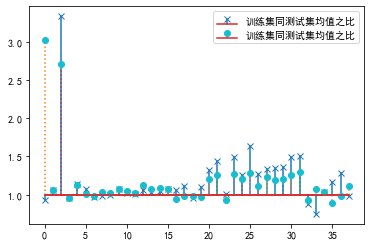

In [369]:
mean_=data_train.describe().loc['mean'][1:-1]/data_test.describe().loc['mean'][1:]
std_=data_train.describe().loc['std'][1:-1]/data_test.describe().loc['std'][1:]
x=np.arange(len(mean_))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.stem(x, mean_, markerfmt='x',bottom=1,label='训练集同测试集均值之比')
plt.stem(x, std_, markerfmt='o',linefmt=':',bottom=1,label='训练集同测试集均值之比')
plt.legend(loc='best')
plt.show()

In [383]:
index=data_train.describe().loc['mean'][1:-1].index
mean_unequal=index[(abs(mean_)>1.5)|(abs(mean_)<0.67)]
std_unequal=index[(abs(std_)>1.5)|(abs(std_)<0.67)]
print('训练集和测试集异常的平均值:',mean_unequal)
print('训练集和测试集异常的平均值:',std_unequal)

训练集和测试集异常的平均值: Index(['saleSecHouseNum', 'supplyNewNum', 'landMeanPrice'], dtype='object')
训练集和测试集异常的平均值: Index(['area', 'saleSecHouseNum'], dtype='object')


### 结论
* 平均值异常的可能是版块的差异

* area特征方差异常可能是训练集数据问题,因为初步发现最小面积是1,违背常理,还要后面再看


### 与参考不同 我将buildYear设置为数值特征

In [428]:
categorical_feas = ['rentType', 'houseType', 'houseFloor', 'houseToward', 'houseDecoration',
    'communityName','city','region','plate']

numerical_feas=['ID','area','totalFloor','saleSecHouseNum','subwayStationNum',
    'busStationNum','interSchoolNum','schoolNum','privateSchoolNum','hospitalNum',
    'drugStoreNum','gymNum','bankNum','shopNum','parkNum','mallNum','superMarketNum',
    'totalTradeMoney','totalTradeArea','tradeMeanPrice','tradeSecNum','totalNewTradeMoney',
    'totalNewTradeArea','tradeNewMeanPrice','tradeNewNum','remainNewNum','supplyNewNum',
    'supplyLandNum','supplyLandArea','tradeLandNum','tradeLandArea','landTotalPrice',
    'landMeanPrice','totalWorkers','newWorkers','residentPopulation','pv','uv','lookNum','buildYear']

## 3 单调特征列分析

In [429]:
def incresing(vals):
    cnt = 0
    len_ = len(vals)
    for i in range(len_-1):
        if vals[i+1] > vals[i]:
            cnt += 1
    return cnt

fea_cols = [col for col in data_train.columns]
for col in fea_cols:
    cnt = incresing(data_train[col].values)
    if cnt / data_train.shape[0] >= 0.55:
        print('单调特征：',col)
        print('单调特征值个数：', cnt)
        print('单调特征值比例：', cnt / data_train.shape[0])

单调特征： tradeTime
单调特征值个数： 24085
单调特征值比例： 0.5812017374517374


**结论**  直接用的是参考的函数,时间列是单调特征列

## 4 特征unique分布

rentType的特征分布如下：


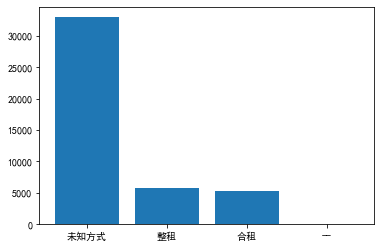

houseType的特征分布如下：


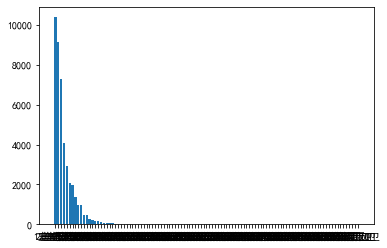

houseFloor的特征分布如下：


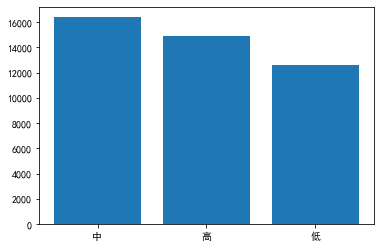

houseToward的特征分布如下：


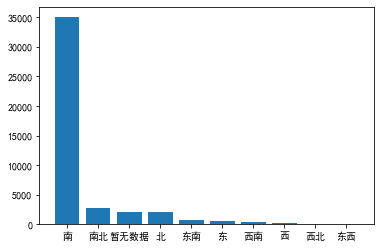

houseDecoration的特征分布如下：


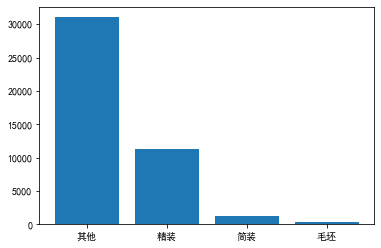

city的特征分布如下：


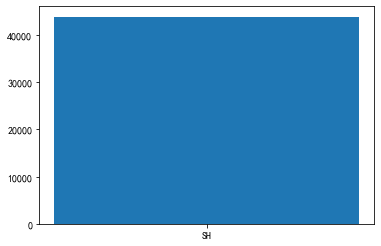

region的特征分布如下：


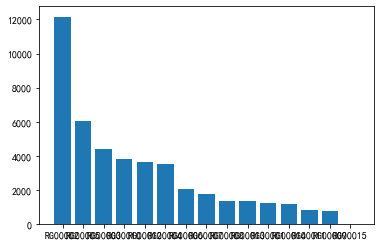

plate的特征分布如下：


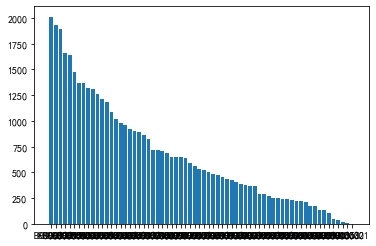

In [430]:
# 特征nunique分布
for feature in categorical_feas:
    
    #data_all[feature].value_counts()
    #print()
    if feature != 'communityName': # communityName值太多，暂且不看图表
        print(feature + "的特征分布如下：")
        plt.bar(data_all[feature].value_counts().index,data_all[feature].value_counts().values)
        plt.show()

简要分析;

* rentType：3种，且绝大多数是无用的未知方式(包括--)；
* houseType：104种，绝大多数在小户型；
* houseFloor：3种，分布较为均匀；
* houseToward： 10种 绝大部分是南；
* houseDecoration： 4种，一大半是其他；
* communityName： 4236种，且分布较为稀疏；
* city: 1种 后面可以删掉
* region： 15种；
* plate： 66种；



## 5 统计特征值频次大于100的特征

In [433]:
for feature in categorical_feas:
    df_value_counts = pd.DataFrame(data_all[feature].value_counts())
    df_value_counts = df_value_counts.reset_index()
    df_value_counts.columns = [feature, 'counts'] # change column names
    print(df_value_counts[df_value_counts['counts'] >= 100])

  rentType  counts
0     未知方式   32944
1       整租    5736
2       合租    5224
   houseType  counts
0     1室1厅1卫   10382
1     2室1厅1卫    9153
2     2室2厅1卫    7269
3     3室1厅1卫    4091
4     3室2厅2卫    2951
5     3室2厅1卫    2050
6     4室1厅1卫    1971
7     1室0厅1卫    1365
8     1室2厅1卫     979
9     2室2厅2卫     948
10    2室0厅1卫     461
11    4室2厅2卫     453
12    4室2厅3卫     278
13    5室1厅1卫     200
14    2室1厅2卫     164
15    3室2厅3卫     153
16    3室1厅2卫     144
  houseFloor  counts
0          中   16389
1          高   14908
2          低   12612
  houseToward  counts
0           南   35043
1          南北    2784
2        暂无数据    2136
3           北    2043
4          东南     658
5           东     553
6          西南     323
7           西     275
  houseDecoration  counts
0              其他   31021
1              精装   11288
2              简装    1273
3              毛坯     327
   communityName  counts
0        XQ01834     359
1        XQ01274     193
2        XQ02273     189
3        XQ03110     186
4        

## 6 Label分布

c:\users\lee\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\lee\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


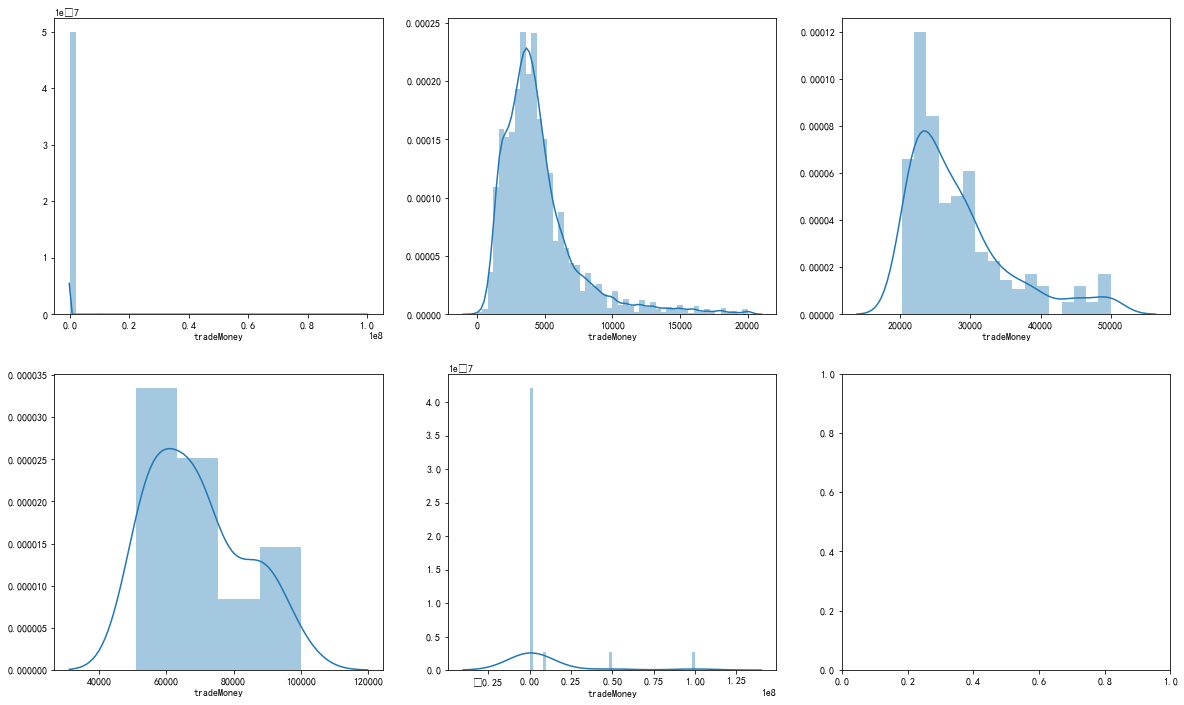

In [436]:
# Labe 分布
import seaborn as sns
fig,axes = plt.subplots(2,3,figsize=(20,5))
fig.set_size_inches(20,12)
sns.distplot(data_train['tradeMoney'],ax=axes[0][0])
sns.distplot(data_train[(data_train['tradeMoney']<=20000)]['tradeMoney'],ax=axes[0][1])
sns.distplot(data_train[(data_train['tradeMoney']>20000)&(data_train['tradeMoney']<=50000)]['tradeMoney'],ax=axes[0][2])
sns.distplot(data_train[(data_train['tradeMoney']>50000)&(data_train['tradeMoney']<=100000)]['tradeMoney'],ax=axes[1][0])
sns.distplot(data_train[(data_train['tradeMoney']>100000)]['tradeMoney'],ax=axes[1][1])

In [437]:
print("money<=10000",len(data_train[(data_train['tradeMoney']<=10000)]['tradeMoney']))
print("10000<money<=20000",len(data_train[(data_train['tradeMoney']>10000)&(data_train['tradeMoney']<=20000)]['tradeMoney']))
print("20000<money<=50000",len(data_train[(data_train['tradeMoney']>20000)&(data_train['tradeMoney']<=50000)]['tradeMoney']))
print("50000<money<=100000",len(data_train[(data_train['tradeMoney']>50000)&(data_train['tradeMoney']<=100000)]['tradeMoney']))
print("100000<money",len(data_train[(data_train['tradeMoney']>100000)]['tradeMoney']))

money<=10000 38964
10000<money<=20000 1985
20000<money<=50000 433
50000<money<=100000 39
100000<money 19


In [ ]:
将目标变量tradeMoney分组，并查看每组间的分布；
可以看出绝大多数都是集中在10000元以内的，售价的均值为8837。